In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")


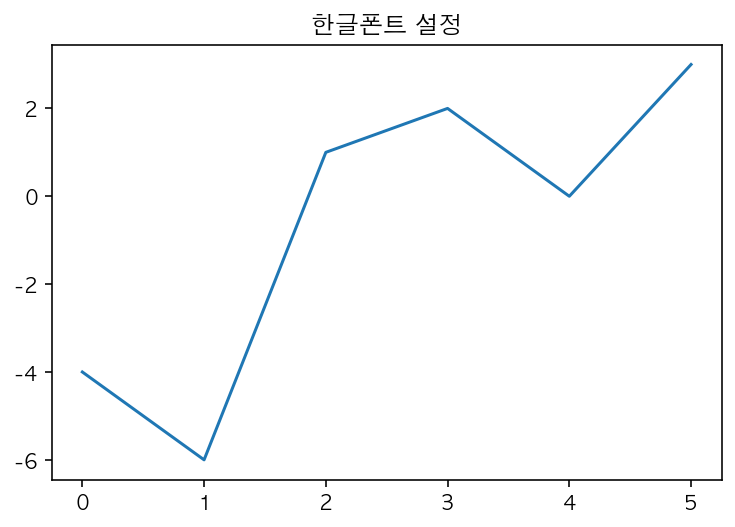

In [2]:
plt.title("한글폰트 설정")
plt.plot([-4, -6, 1, 2, 0, 3])

In [3]:
df = pd.read_csv("data/store.csv", sep='|')
df.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378      대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041       NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748       NaN   
3    Q07A10        토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
3      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455  35.159774  
4      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071  37.500249  

[5 rows x 39 columns]

In [4]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
print(df.shape)
df = df[columns].copy()
print(df.shape)
df.info()
df.head()

(573680, 39)
(573680, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
3       싱싱커피&토스트       음식     패스트푸드        토스트전문  부산광역시  사상구   괘법동  괘법동   
4       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   

                  도로명주소          경도         위도  
0  서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3      부산광역시 사상구 괘감로 37  128.980455  35.159774  
4      서울특별시 송파구 가락로 71  127.104071  37.500249

In [5]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
print(df_seoul.shape)
df_seoul.head()

(407376, 11)


상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
4       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   
5            초밥왕       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구  잠실6동  신천동   

                   도로명주소          경도         위도  
0   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
4       서울특별시 송파구 가락로 71  127.104071  37.500249  
5  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149

In [6]:
df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [7]:
df_seoul["시군구명"].nunique()

25

In [8]:
df_seoul.to_csv("data/seoul_open_store.csv", index=False)
pd.read_csv("data/seoul_open_store.csv").head()

상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
3       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   
4            초밥왕       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구  잠실6동  신천동   

                   도로명주소          경도         위도  
0   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3       서울특별시 송파구 가락로 71  127.104071  37.500249  
4  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149

In [9]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()
df_seoul["상호명_소문자"].str.extract("(베|배)스킨라빈스|baskinrobbins")[0].value_counts()

배    347
베    117
Name: 0, dtype: int64

In [10]:
df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(657, 12)

In [11]:
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), "브랜드명"] = "배스킨라빈스"
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31["브랜드명"].unique()

array(['배스킨라빈스', '던킨도너츠'], dtype=object)

In [12]:
df_31["상권업종대분류명"].value_counts()

음식       655
생활서비스      1
소매         1
Name: 상권업종대분류명, dtype: int64

In [13]:
df_31 = df_31[~df_31["상권업종대분류명"].isin(["생활서비스", "소매"])]
df_31["상권업종대분류명"].value_counts()

음식    655
Name: 상권업종대분류명, dtype: int64

In [14]:
df_31.head()

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명 법정동명  \
76         배스킨라빈스       음식    패스트푸드  아이스크림판매  서울특별시   관악구   청룡동  봉천동   
1167        던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시  서대문구   신촌동  대현동   
1819  던킨도너츠테크노마트점       음식    패스트푸드    도너츠전문  서울특별시   광진구  구의3동  구의동   
2164       베스킨라빈스       음식    패스트푸드  아이스크림판매  서울특별시   마포구   서교동  서교동   
2305   던킨도너츠창동하나로       음식    패스트푸드    도너츠전문  서울특별시   도봉구   창4동   창동   

                     도로명주소          경도         위도      상호명_소문자    브랜드명  
76       서울특별시 관악구 관악로 161  126.952166  37.479599       배스킨라빈스  배스킨라빈스  
1167   서울특별시 서대문구 이화여대길 56  126.945369  37.559263        던킨도너츠   던킨도너츠  
1819  서울특별시 광진구 광나루로56길 85  127.095681  37.535713  던킨도너츠테크노마트점   던킨도너츠  
2164     서울특별시 마포구 와우산로 88  126.923809  37.552104       베스킨라빈스  배스킨라빈스  
2305   서울특별시 도봉구 마들로11길 20  127.050818  37.655101   던킨도너츠창동하나로   던킨도너츠

In [15]:
s_brand_count = df_31["브랜드명"].value_counts()
s_brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

<AxesSubplot:>

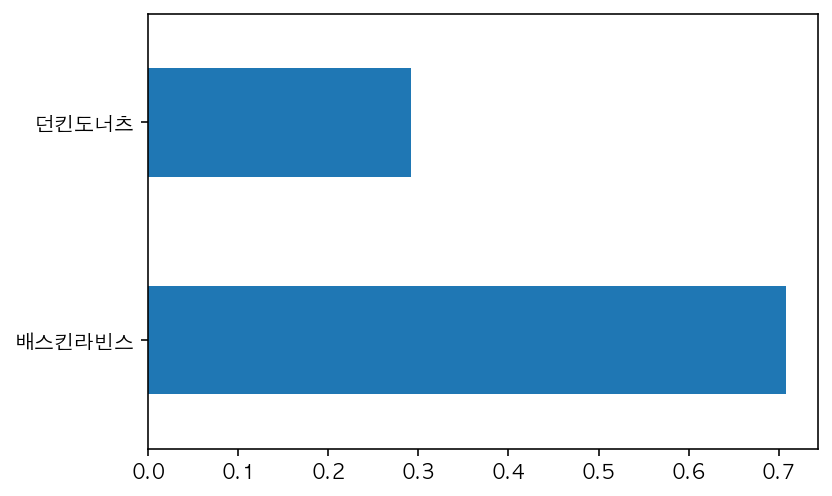

In [16]:
df_31["브랜드명"].value_counts(normalize = True).plot.barh()

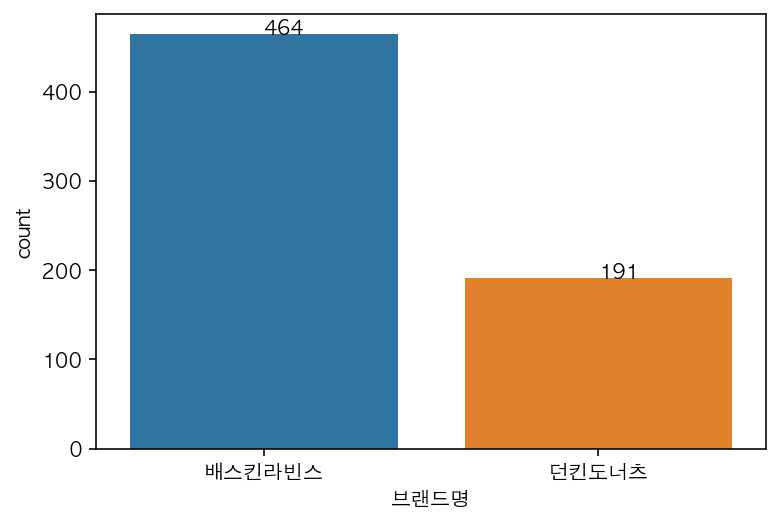

In [17]:
g = sns.countplot(data = df_31, x = "브랜드명")

for i, val in enumerate(s_brand_count.index):
    g.text(x = i, y = s_brand_count[i], s = s_brand_count[i])

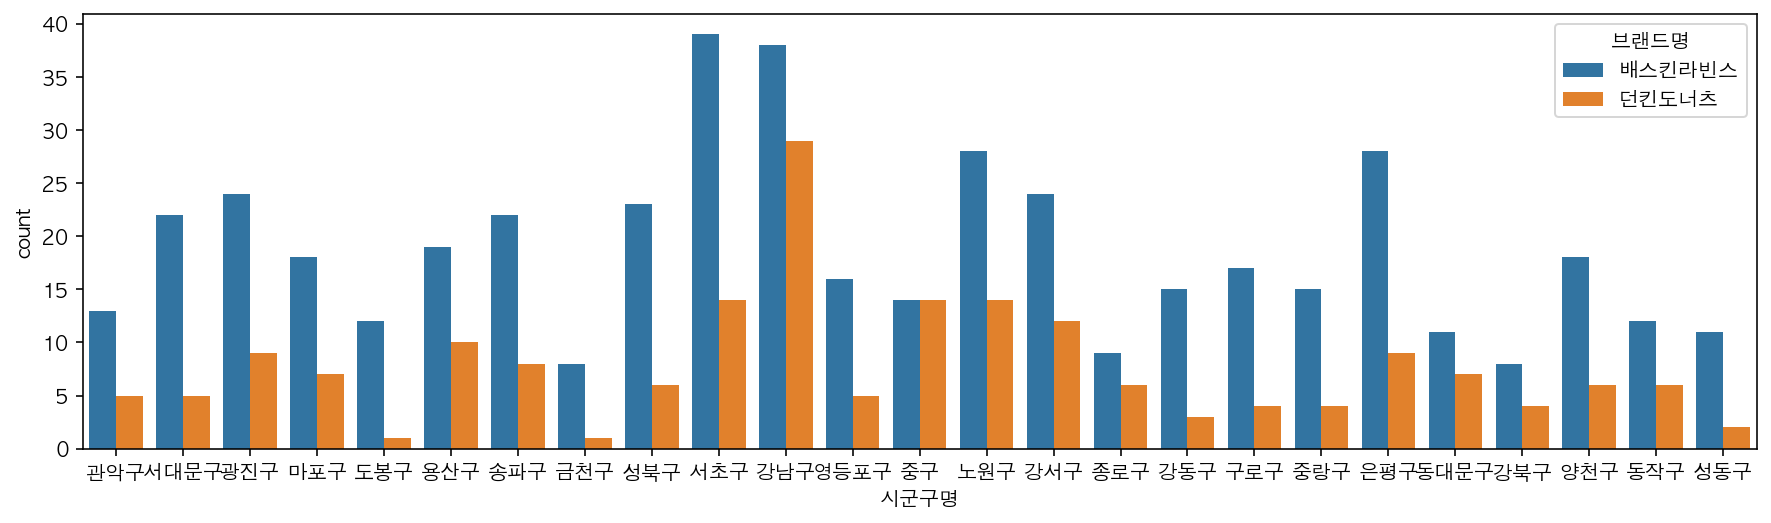

In [18]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data= df_31, x= "시군구명", hue= "브랜드명")

In [19]:
table_city_brand = df_31.pivot_table(index="시군구명", columns="브랜드명", values="상호명", aggfunc="count")
print(type(table_city_brand))
table_city_brand.head()

<class 'pandas.core.frame.DataFrame'>


브랜드명  던킨도너츠  배스킨라빈스
시군구명               
강남구      29      38
강동구       3      15
강북구       4       8
강서구      12      24
관악구       5      13

In [20]:
# row 마다 index, series 
for i, val in table_city_brand.iterrows():
    print(val)
    dunkin = val["던킨도너츠"]
    baskin = val["배스킨라빈스"]
    print(dunkin, baskin)

브랜드명
던킨도너츠     29
배스킨라빈스    38
Name: 강남구, dtype: int64
29 38
브랜드명
던킨도너츠      3
배스킨라빈스    15
Name: 강동구, dtype: int64
3 15
브랜드명
던킨도너츠     4
배스킨라빈스    8
Name: 강북구, dtype: int64
4 8
브랜드명
던킨도너츠     12
배스킨라빈스    24
Name: 강서구, dtype: int64
12 24
브랜드명
던킨도너츠      5
배스킨라빈스    13
Name: 관악구, dtype: int64
5 13
브랜드명
던킨도너츠      9
배스킨라빈스    24
Name: 광진구, dtype: int64
9 24
브랜드명
던킨도너츠      4
배스킨라빈스    17
Name: 구로구, dtype: int64
4 17
브랜드명
던킨도너츠     1
배스킨라빈스    8
Name: 금천구, dtype: int64
1 8
브랜드명
던킨도너츠     14
배스킨라빈스    28
Name: 노원구, dtype: int64
14 28
브랜드명
던킨도너츠      1
배스킨라빈스    12
Name: 도봉구, dtype: int64
1 12
브랜드명
던킨도너츠      7
배스킨라빈스    11
Name: 동대문구, dtype: int64
7 11
브랜드명
던킨도너츠      6
배스킨라빈스    12
Name: 동작구, dtype: int64
6 12
브랜드명
던킨도너츠      7
배스킨라빈스    18
Name: 마포구, dtype: int64
7 18
브랜드명
던킨도너츠      5
배스킨라빈스    22
Name: 서대문구, dtype: int64
5 22
브랜드명
던킨도너츠     14
배스킨라빈스    39
Name: 서초구, dtype: int64
14 39
브랜드명
던킨도너츠      2
배스킨라빈스    11
Name: 성동구, dtype: int64
2 11
브랜드명
던킨도너츠      6
배스킨라빈스    23
Name: 성북구

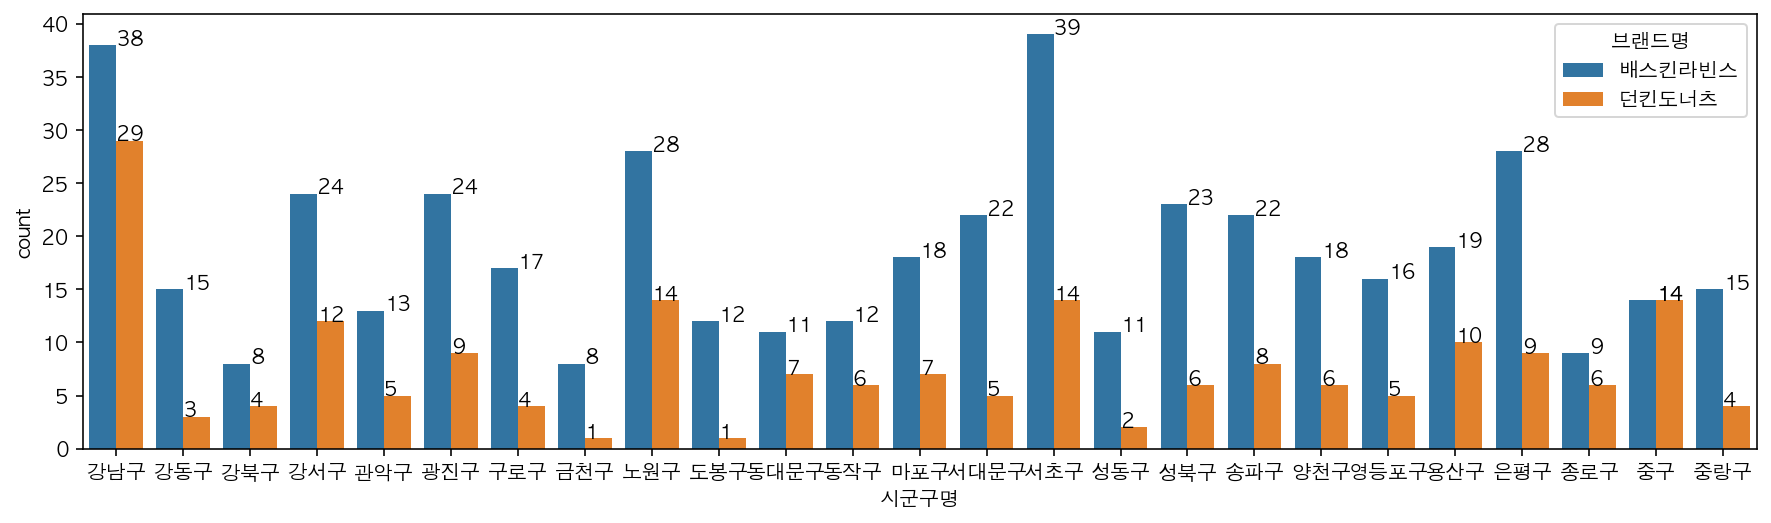

In [21]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명", order=table_city_brand.index)

index_no = 0
for i, val in table_city_brand.iterrows():
    dunkin = val["던킨도너츠"]
    baskin = val["배스킨라빈스"]
    g.text(x=index_no, y=dunkin, s=dunkin)
    g.text(x=index_no, y=baskin, s=baskin)
    index_no = index_no + 1

<AxesSubplot:xlabel='경도', ylabel='위도'>

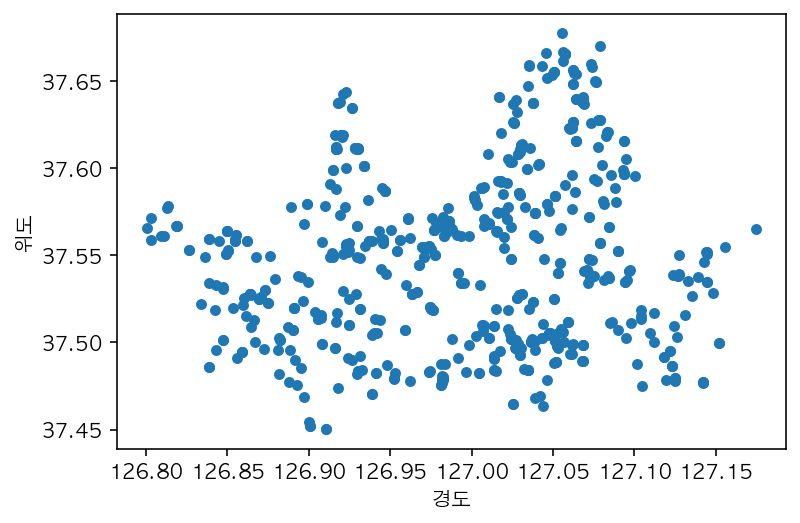

In [22]:
df_31[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

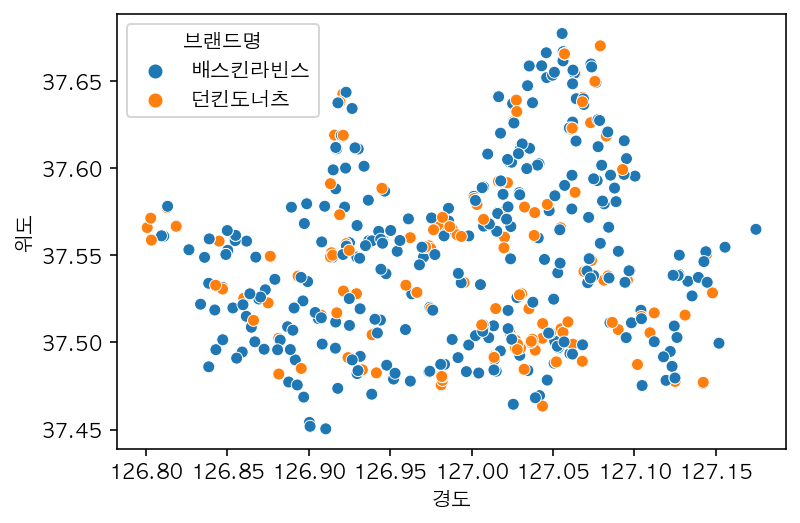

In [23]:
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

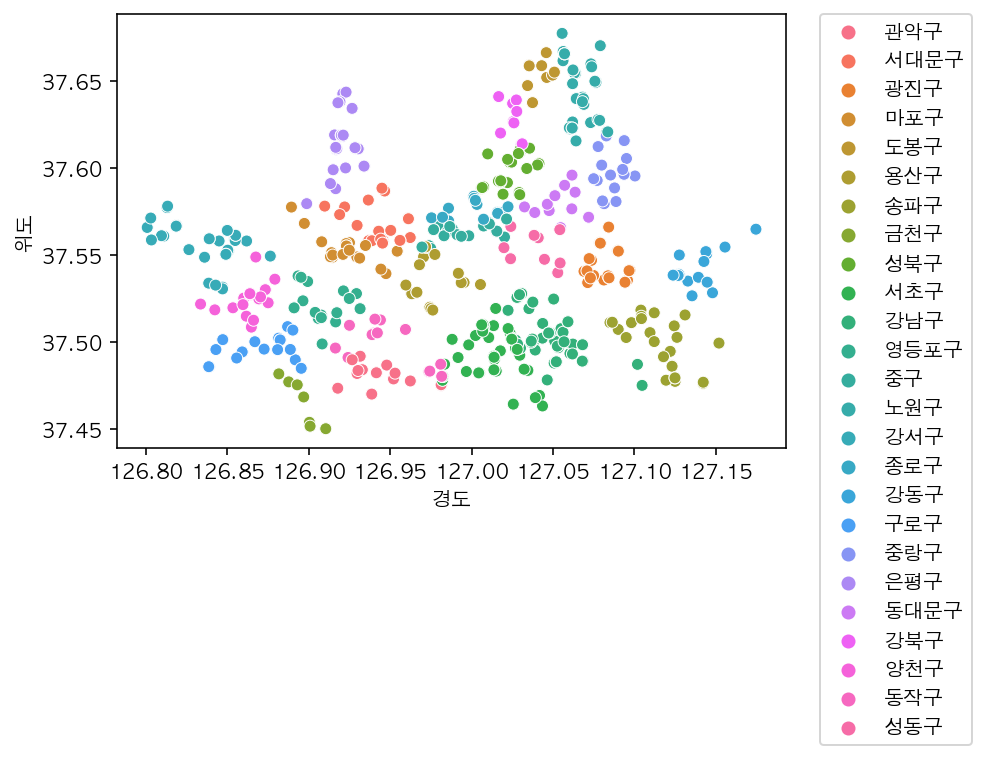

In [24]:
sns.scatterplot(data=df_31, x="경도", y="위도", hue="시군구명")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

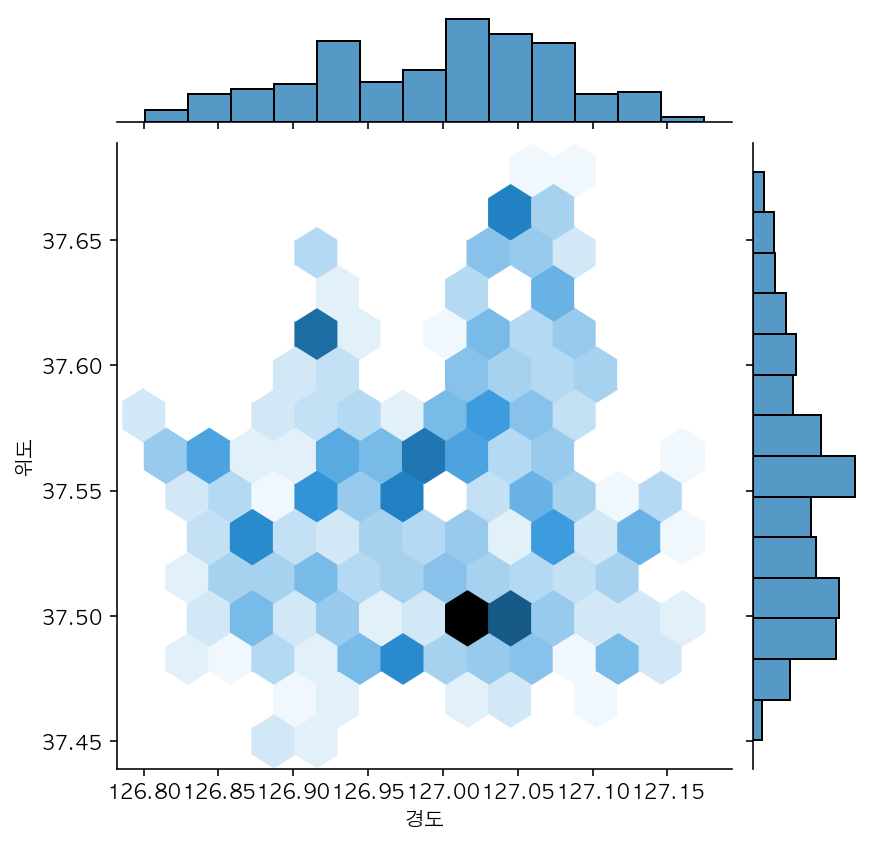

In [25]:
sns.jointplot(data=df_31, x="경도", y="위도", kind="hex")

In [26]:
import folium
lat = df_31["위도"].mean()
long = df_31["경도"].mean()
lat, long

(37.548567678569114, 126.99419527148807)

In [27]:
m = folium.Map([lat, long])
# 127.039032	37.495593
folium.Marker(
    [37.495593, 127.039032], 
    popup='<i>던킨도너츠</i>', 
    tooltip="던킨도너츠").add_to(m)
m

In [28]:
df_31.sample(random_state=31)

m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

m.save('data/index.html')
m

In [29]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(marker_cluster)

m.save('data/index.html')
m

In [30]:
m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")

for i in df_31.index:
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

m.save('data/index.html')
m

In [31]:
from folium.plugins import HeatMap
m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")

for i in df_31.index:
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

heat = df_31[["위도", "경도", "브랜드명"]].copy()
heat["브랜드명"] = heat["브랜드명"].str.strip()
heat["브랜드명"] = heat["브랜드명"].replace("배스킨라빈스", 1).replace("던킨도너츠", 1)
heat = heat.values
HeatMap(heat).add_to(m)
m.save('data/index.html')
m